## We want to find out best combination of customer satisfaction.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(103904, 25)

In [4]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [6]:
df.isnull().mean()*100

Unnamed: 0                           0.000000
id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                       

In [7]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(),inplace=True)

In [8]:
# Dropping out unnecessary columns
df.drop(['Unnamed: 0','id'],axis=1,inplace=True)

In [9]:
num_cols = [feature for feature in df.columns if df[feature].dtype!='O']
cat_cols = [feature for feature in df.columns if df[feature].dtype == 'O']

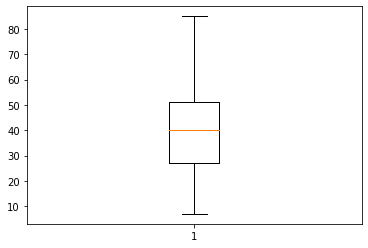

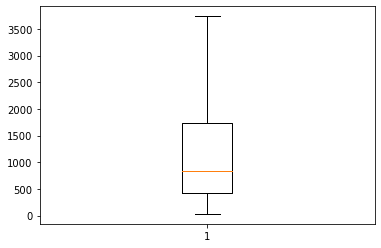

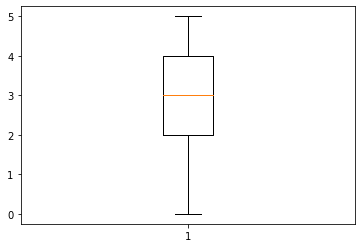

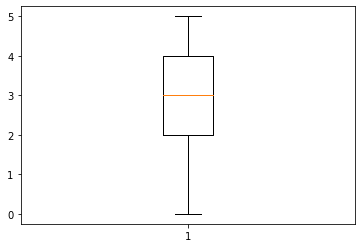

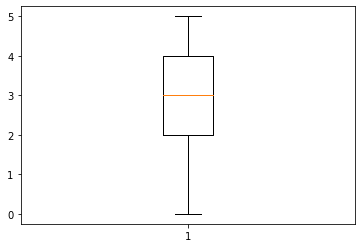

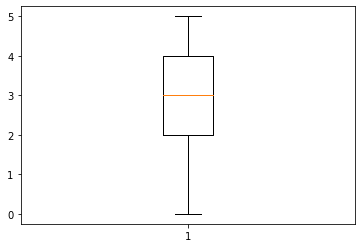

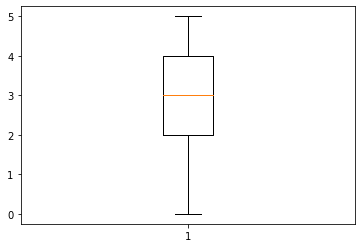

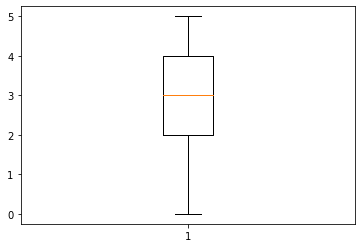

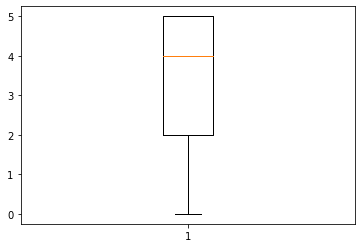

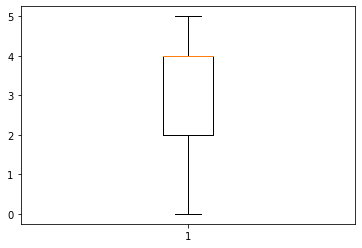

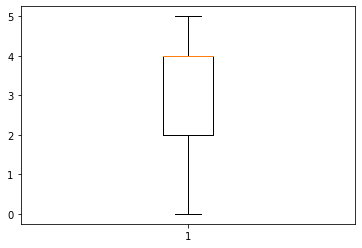

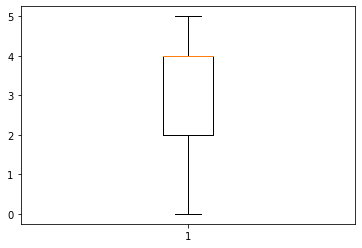

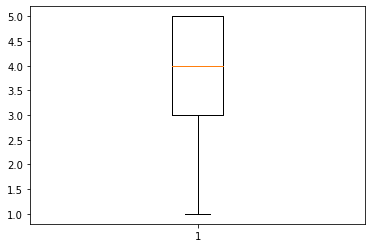

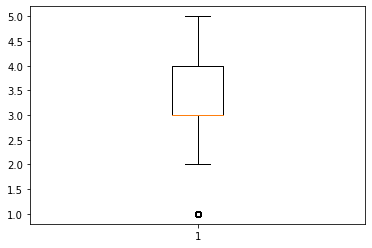

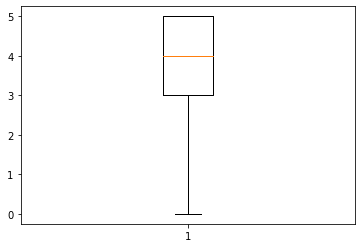

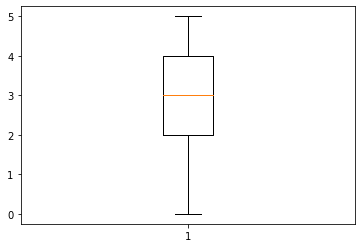

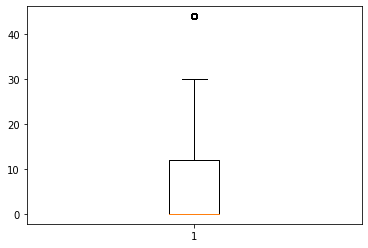

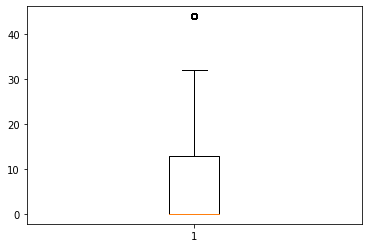

In [10]:
for i in num_cols:
    iqr = df[i].quantile(0.75) - df[i].quantile(0.25)
    lower = df[i].quantile(0.1)
    higher = df[i].quantile(0.9)
    lower_range = df[i].quantile(0.25) - (1.5*iqr)
    higher_range = df[i].quantile(0.75) + (1.5*iqr)
    df[i] = np.where(df[i] > higher_range,higher,df[i])
    df[i] = np.where(df[i] < lower_range,lower,df[i])
    plt.boxplot(df[i])
    plt.show()

## Univariate analysis

In [11]:
df[num_cols]

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,13.0,460.0,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0
1,25.0,235.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,6.0
2,26.0,1142.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0
3,25.0,562.0,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,9.0
4,61.0,214.0,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23.0,192.0,2.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,1.0,4.0,2.0,3.0,2.0,3.0,0.0
103900,49.0,2347.0,4.0,4.0,4.0,4.0,2.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,0.0,0.0
103901,30.0,1995.0,1.0,1.0,1.0,3.0,4.0,1.0,5.0,4.0,3.0,2.0,4.0,5.0,5.0,4.0,7.0,14.0
103902,22.0,1000.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,4.0,5.0,1.0,5.0,4.0,1.0,0.0,0.0


-------Age------
no of unique values 75
median =  40.0
count    103904.000000
mean         39.379706
std          15.114964
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: Age, dtype: float64


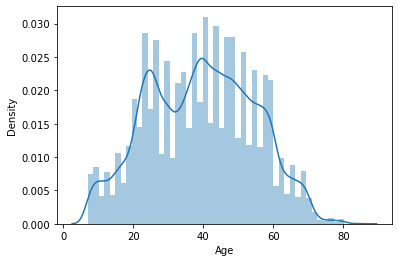

-------Flight Distance------
no of unique values 3533
median =  843.0
count    103904.000000
mean       1164.382391
std         941.503884
min          31.000000
25%         414.000000
50%         843.000000
75%        1743.000000
max        3736.000000
Name: Flight Distance, dtype: float64


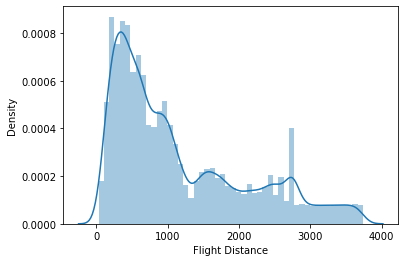

-------Inflight wifi service------
no of unique values 6
3.0    25868
2.0    25830
4.0    19794
1.0    17840
5.0    11469
0.0     3103
Name: Inflight wifi service, dtype: int64


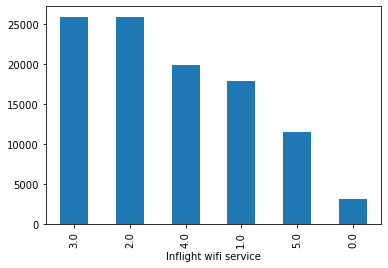

-------Departure/Arrival time convenient------
no of unique values 6
4.0    25546
5.0    22403
3.0    17966
2.0    17191
1.0    15498
0.0     5300
Name: Departure/Arrival time convenient, dtype: int64


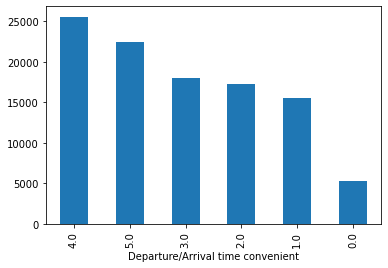

-------Ease of Online booking------
no of unique values 6
3.0    24449
2.0    24021
4.0    19571
1.0    17525
5.0    13851
0.0     4487
Name: Ease of Online booking, dtype: int64


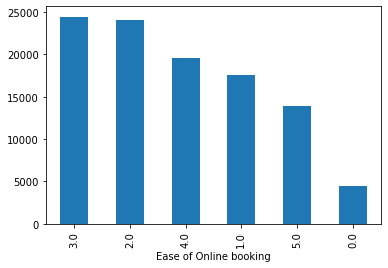

-------Gate location------
no of unique values 6
3.0    28577
4.0    24426
2.0    19459
1.0    17562
5.0    13879
0.0        1
Name: Gate location, dtype: int64


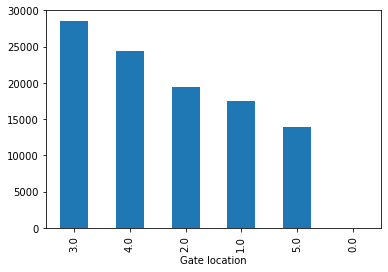

-------Food and drink------
no of unique values 6
4.0    24359
5.0    22313
3.0    22300
2.0    21988
1.0    12837
0.0      107
Name: Food and drink, dtype: int64


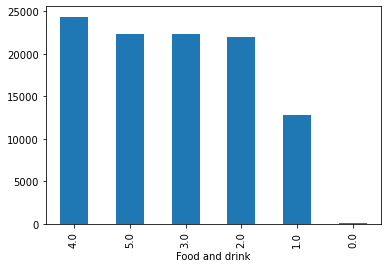

-------Online boarding------
no of unique values 6
4.0    30762
3.0    21804
5.0    20713
2.0    17505
1.0    10692
0.0     2428
Name: Online boarding, dtype: int64


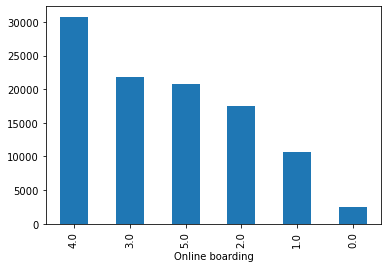

-------Seat comfort------
no of unique values 6
4.0    31765
5.0    26470
3.0    18696
2.0    14897
1.0    12075
0.0        1
Name: Seat comfort, dtype: int64


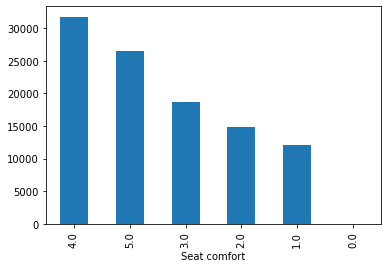

-------Inflight entertainment------
no of unique values 6
4.0    29423
5.0    25213
3.0    19139
2.0    17637
1.0    12478
0.0       14
Name: Inflight entertainment, dtype: int64


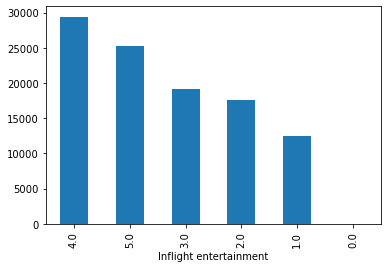

-------On-board service------
no of unique values 6
4.0    30867
5.0    23648
3.0    22833
2.0    14681
1.0    11872
0.0        3
Name: On-board service, dtype: int64


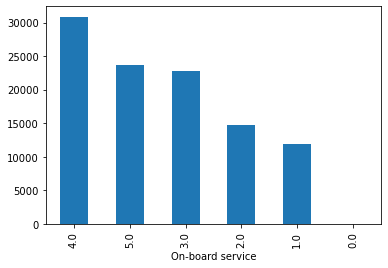

-------Leg room service------
no of unique values 6
4.0    28789
5.0    24667
3.0    20098
2.0    19525
1.0    10353
0.0      472
Name: Leg room service, dtype: int64


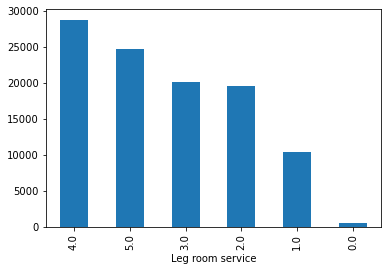

-------Baggage handling------
no of unique values 5
4.0    37383
5.0    27131
3.0    20632
2.0    11521
1.0     7237
Name: Baggage handling, dtype: int64


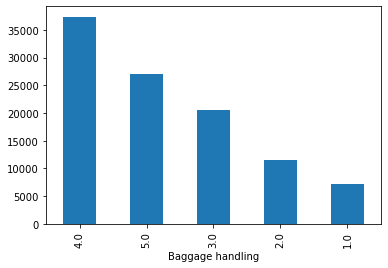

-------Checkin service------
no of unique values 5
4.0    29055
3.0    28446
5.0    20619
2.0    12893
1.0    12891
Name: Checkin service, dtype: int64


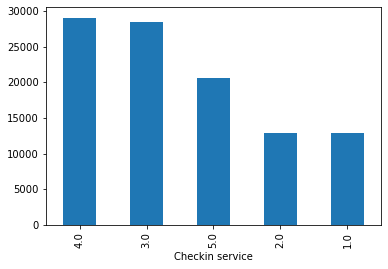

-------Inflight service------
no of unique values 6
4.0    37945
5.0    27116
3.0    20299
2.0    11457
1.0     7084
0.0        3
Name: Inflight service, dtype: int64


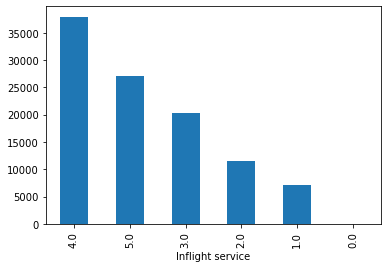

-------Cleanliness------
no of unique values 6
4.0    27179
3.0    24574
5.0    22689
2.0    16132
1.0    13318
0.0       12
Name: Cleanliness, dtype: int64


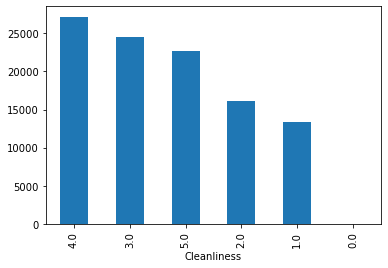

-------Departure Delay in Minutes------
no of unique values 32
median =  0.0
count    103904.000000
mean          9.353932
std          15.428880
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max          44.000000
Name: Departure Delay in Minutes, dtype: float64


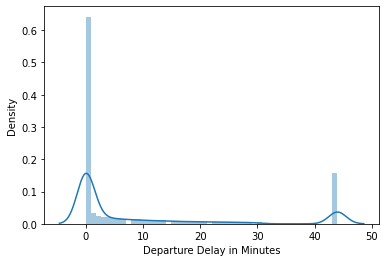

-------Arrival Delay in Minutes------
no of unique values 34
median =  0.0
count    103904.000000
mean          9.453909
std          15.313627
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max          44.000000
Name: Arrival Delay in Minutes, dtype: float64


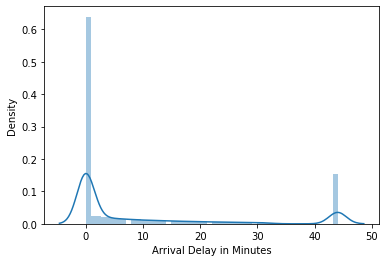

In [12]:
# Univariate for num columns 
for feature in num_cols:
    print('-------'+ feature + '------')
    print('no of unique values',df[feature].nunique())
    if df[feature].nunique() < 15:
        print(df[feature].value_counts())
        df[feature].value_counts().plot(kind='bar')
        plt.xlabel(feature)
        plt.show()
    else:
        print('median = ',df[feature].median())
        print(df[feature].describe())
        sns.distplot(df[feature])
        plt.xlabel(feature)
        plt.show()
    

------ Gender -----
number of unique values 2
Female    52727
Male      51177
Name: Gender, dtype: int64


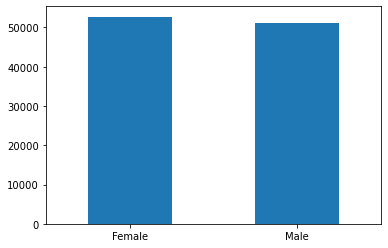

------ Customer Type -----
number of unique values 2
Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64


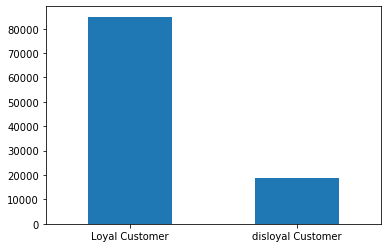

------ Type of Travel -----
number of unique values 2
Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64


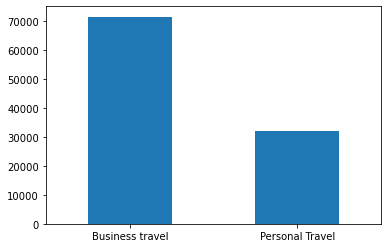

------ Class -----
number of unique values 3
Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64


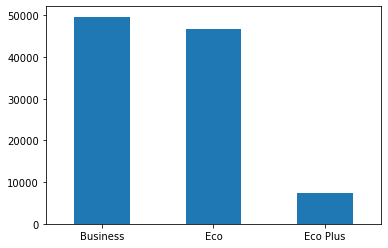

------ satisfaction -----
number of unique values 2
neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64


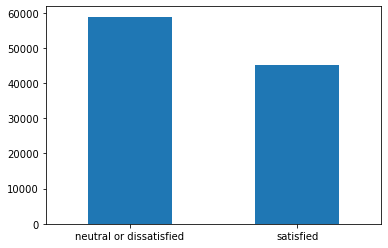

In [13]:
# Univariate for categorical columns
for feature in cat_cols:
    print('------',feature,'-----')
    print('number of unique values',df[feature].nunique())
    print(df[feature].value_counts())
    #print('mode = ',df[feature].mode()[0])
    df[feature].value_counts().plot(kind='bar',rot=0)
    plt.show()

## Bivariate Analysis

In [15]:
#plt.figure(figsize=(10,5),dpi=100)
#sns.heatmap(df.corr(),annot=True,fmt='0.2f')

In [16]:
#%%time
#sns.pairplot(df)

In [17]:
corr = []
for i in df.columns:
    for j in df.columns:
        if df[i].dtype != 'O' and df[j].dtype != 'O':
            corrc = np.corrcoef(df[i].values,df[j].values)[0][1]
            if corrc > 0.5 and corrc != 1.0:
                corr.append([i,j])

In [18]:
df['Gender'].groupby(df['satisfaction']).count()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: Gender, dtype: int64

In [19]:
pd.set_option('max_columns',None)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13.0,Personal Travel,Eco Plus,460.0,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25.0,Business travel,Business,235.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26.0,Business travel,Business,1142.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0,satisfied
3,Female,Loyal Customer,25.0,Business travel,Business,562.0,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61.0,Business travel,Business,214.0,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0,satisfied


In [20]:
df.groupby('satisfaction').count()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
satisfaction,,,,,,,,,,,,,,,,,,,,,,
neutral or dissatisfied,58879,58879,58879,58879,58879,58879,58879,58879,58879,58879,58879,58879,58879,58879,58879,58879,58879,58879,58879,58879,58879,58879
satisfied,45025,45025,45025,45025,45025,45025,45025,45025,45025,45025,45025,45025,45025,45025,45025,45025,45025,45025,45025,45025,45025,45025


In [21]:
pd.pivot_table(index='satisfaction',values=['Departure Delay in Minutes','Arrival Delay in Minutes'],data=df,aggfunc='mean')

,Arrival Delay in Minutes,Departure Delay in Minutes
satisfaction,,
neutral or dissatisfied,10.676676,10.333582
satisfied,7.854903,8.072848


In [22]:
num_cols.remove('Age')

In [23]:
num_cols.remove('Flight Distance')

In [24]:
num_cols

['Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [25]:
data = pd.DataFrame()

In [26]:
for i in num_cols:
    data.join(pd.DataFrame(df.pivot_table(index=[i],values=['satisfaction'],aggfunc='count')))

In [27]:
data.head()

""


In [28]:
x = pd.get_dummies(df['Type of Travel'])
x.head()

,Business travel,Personal Travel
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [29]:
df = pd.concat([df,x],axis=1).drop('Type of Travel',axis=1)
df.head()

,Gender,Customer Type,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Business travel,Personal Travel
0,Male,Loyal Customer,13.0,Eco Plus,460.0,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0,neutral or dissatisfied,0,1
1,Male,disloyal Customer,25.0,Business,235.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,6.0,neutral or dissatisfied,1,0
2,Female,Loyal Customer,26.0,Business,1142.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0,satisfied,1,0
3,Female,Loyal Customer,25.0,Business,562.0,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,9.0,neutral or dissatisfied,1,0
4,Male,Loyal Customer,61.0,Business,214.0,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0,satisfied,1,0


In [30]:
#pd.set_option('display.max_rows',None)
df.pivot_table(index=['Business travel','Departure/Arrival time convenient','Departure Delay in Minutes','Arrival Delay in Minutes'],values='satisfaction',aggfunc='count')

satisfaction
Business travel Departure/Arrival time convenient Departure Delay in Minutes Arrival Delay in Minutes              
0               0.0                               0.0                        0.0                                422
                                                                             1.0                                 12
                                                                             2.0                                 11
                                                                             3.0                                 14
                                                                             4.0                                  2
...                                                                                                             ...
1               5.0                               44.0                       29.0                                20
                                                                             30.0                                35
                                                                             31.0                                24
                                                                             32.0                                13
                                                                             44.0                              1336

[8214 rows x 1 columns]

### We can conclude that for people who uses aeroplanes for buisness purpose their main priority is time and so arrival and departure delay time should be less if its 

In [33]:
df['delay'] = (df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes']) /2

In [36]:
df['delay']
df.drop(['Departure Delay in Minutes','Arrival Delay in Minutes'],inplace=True,axis=1)

In [35]:
df.head()

,Gender,Customer Type,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Business travel,Personal Travel,delay
0,Male,Loyal Customer,13.0,Eco Plus,460.0,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0,neutral or dissatisfied,0,1,21.5
1,Male,disloyal Customer,25.0,Business,235.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,6.0,neutral or dissatisfied,1,0,3.5
2,Female,Loyal Customer,26.0,Business,1142.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0,satisfied,1,0,0.0
3,Female,Loyal Customer,25.0,Business,562.0,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,9.0,neutral or dissatisfied,1,0,10.0
4,Male,Loyal Customer,61.0,Business,214.0,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0,satisfied,1,0,0.0


<AxesSubplot:>

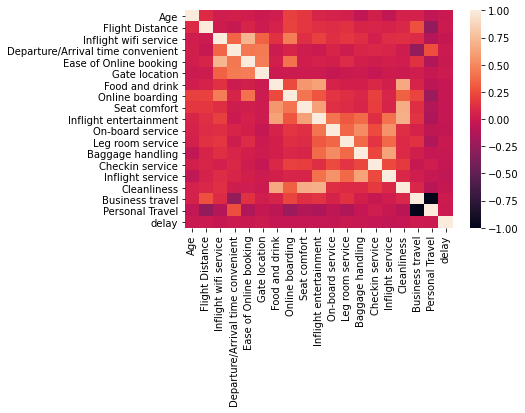

In [38]:
sns.heatmap(df.corr())